In [1]:
import pandas as pd

In [2]:
ts1 = pd.Timestamp("2025-03-01") # формат (ГГГГ-ММ-ДД)
print(ts1)

2025-03-01 00:00:00


In [4]:
print(type(ts1))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [5]:
ts2 = pd.Timestamp("2025-09-01 22:00:30")
print("Timestamp с датой и временем:\n", ts2)

Timestamp с датой и временем:
 2025-09-01 22:00:30


In [6]:
print("Год:\n", ts2.year, "\nМесяц:\n", ts2.month, "\nДень:\n", ts2.day,
     "\nЧасы:\n", ts2.hour, "\nМинуты:\n", ts2.minute, "\nСекунды:\n", ts2.second)

Год:
 2025 
Месяц:
 9 
День:
 1 
Часы:
 22 
Минуты:
 0 
Секунды:
 30


In [7]:
ts3 = ts2 + pd.Timedelta(days=7)
print("Дата через неделю:\n", ts3)

Дата через неделю:
 2025-09-08 22:00:30


In [14]:
# ГГГГ-ММ-ДД
dates = pd.to_datetime(["2025-01-01", "2025-01-02", "2025-01-03"])
print("DatetimeIndex:\n", dates)

DatetimeIndex:
 DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03'], dtype='datetime64[ns]', freq=None)


In [16]:
print(type(dates))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [17]:
ts = pd.Series([100, 200, 300], index=dates)
print("Series c DatetimeIndex:\n", ts)

Series c DatetimeIndex:
 2025-01-01    100
2025-01-02    200
2025-01-03    300
dtype: int64


In [18]:
print("Значение за 2025-01-02:\n", ts["2025-01-02"])

Значение за 2025-01-02:
 200


In [19]:
rng = pd.date_range(start="2025-03-1", periods=5, freq="D")
print("Диапазон дат:\n", rng)

Диапазон дат:
 DatetimeIndex(['2025-03-01', '2025-03-02', '2025-03-03', '2025-03-04',
               '2025-03-05'],
              dtype='datetime64[ns]', freq='D')


In [20]:
# ГГГГ-ММ
p1 = pd.Period("2025-03", freq="M")
print("Period (M)", p1)

Period (M) 2025-03


In [21]:
print(type(p1))

<class 'pandas._libs.tslibs.period.Period'>


In [22]:
p2 = pd.Period("2025", freq="Y")
print("Period (Y):\n", p2)

Period (Y):
 2025


In [23]:
print("Следующий месяц: ", p1 + 1)

Следующий месяц:  2025-04


In [24]:
print("Предыдущий год:\n", p2 - 1)

Предыдущий год:
 2024


In [25]:
# диапазон периодов с января по июнь 2025
period_range = pd.period_range("2025-01", "2025-06", freq="M")
print("period range: \n", period_range)

period range: 
 PeriodIndex(['2025-01', '2025-02', '2025-03', '2025-04', '2025-05', '2025-06'], dtype='period[M]')


**A: Добавление пустой ячейки сверху\
B: Добавление пустой ячейки снизу\
DD: Удаления ячейки\
C: Копирование ячеек\
X: Вырезание ячеек\
V: Вставка ячеек**

**Создайте стековую столбчатую диаграмму, используя данные из файла CSV, загруженного с Kaggle, для отображения продаж первых 8 видеоигр по регионам.\
https://www.kaggle.com/datasets/gregorut/videogamesales?resource=download**

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv("vgsales.csv")

In [28]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [29]:
data.head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [31]:
# извлечем данные о продажах первых 8 видеоигр по регионам
top_games = data.head(8)
top_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


In [32]:
# создадим список с названиями столбцов, представляющих регионы продаж
sales_regions = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
sales_regions

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

In [37]:
# извлечем наименования игр
game_names = top_games["Name"].values
game_names

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii',
       'Wii Sports Resort', 'Pokemon Red/Pokemon Blue', 'Tetris',
       'New Super Mario Bros.', 'Wii Play'], dtype=object)

In [38]:
# данные о продажах по регионам (транспонируем)
sales_data = top_games[sales_regions].values.T

In [39]:
sales_data

array([[41.49, 29.08, 15.85, 15.75, 11.27, 23.2 , 11.38, 14.03],
       [29.02,  3.58, 12.88, 11.01,  8.89,  2.26,  9.23,  9.2 ],
       [ 3.77,  6.81,  3.79,  3.28, 10.22,  4.22,  6.5 ,  2.93],
       [ 8.46,  0.77,  3.31,  2.96,  1.  ,  0.58,  2.9 ,  2.85]])

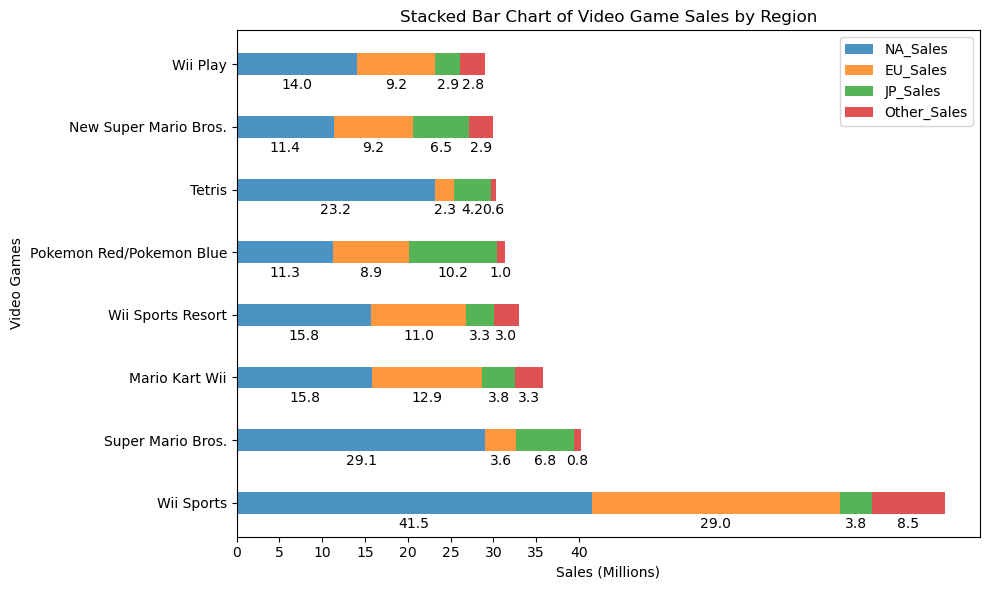

In [44]:
# Создаем объекты Figure и Axes с помощью функции subplots()
fig, ax = plt.subplots(figsize=(10, 6))

# Задаем высоту столбцов
bar_height = 0.35

# Задаем значение прозрачности столбцов
opacity = 0.8

# Создаем массив индексов для игр на оси Y
ind = np.arange(len(game_names))

# Цикл для отрисовки столбцов каждого региона.
# строим "слоёную" (stacked) горизонтальную диаграмму: для i-го региона
#       рисуем набор прямоугольников такой же высоты, смещая их по оси X на сумму
#       значений предыдущих регионов (чтобы столбики складывались в одну полосу).
for i in range(len(sales_regions)):  # range(...) даёт 0..N-1; len(...) — число регионов.
    # Рисуем столбцы для каждого региона с помощью barh():
    # plt.barh(y, width, height=..., left=..., ...) - "горизонтальные столбцы":
    #   y        — вертикальные позиции центров столбцов (например, индексы категорий);
    #   width    — длины столбцов вдоль оси X (здесь — значения продаж);
    #   height   — толщина столбца вдоль оси Y; обычно одна и та же для всех полос;
    #   left     — стартовая координата по X (смещение); важно для "stacked" эффекта;
    #   alpha    — прозрачность (0..1), чтобы слои были различимы при наложении;
    # Функция возвращает контейнер из объектов Rectangle — графических "прямоугольников".
    if i == 0:
        # Для первой "прослойки" смещение left не требуется (начинаем от X=0).
        rects = plt.barh(
            ind,                  # массив Y-координат центров полос (например, np.arange(n))
            sales_data[i],        # массив ширин по X (продажи региона i для всех категорий)
            bar_height,           # высота каждой полосы (толщина по Y)
            alpha=opacity         # прозрачность (например, 0.8)
        )
    else:
        # Для последующих слоёв нужно смещение left — сумма всех предыдущих слоёв по категории.
        # sales_data[:i] — "срез" по первым i регионам (0..i-1);
        # .sum(axis=0)   — суммируем по строкам, оставляя вектор длиной = числу категорий.
        rects = plt.barh(
            ind,                                   # те же Y-координаты центров
            sales_data[i],                         # текущие ширины по X (регион i)
            bar_height,                            # высота полос
            alpha=opacity,                         # прозрачность
            left=sales_data[:i].sum(axis=0)        # ключ: старт X - кумулятивная сумма слоёв
        )

    # "rects"
    # barh() возвращает контейнер из "прямоугольников" (Rectangle patches) — множественное число:
    # rects (rectangles). Внутри цикла "for rect in rects" мы обходими каждый прямоугольник.

    # Цикл для добавления подписей к каждому прямоугольнику (каждой полосе)
    for rect in rects:
        # Методы у прямоугольника (Rectangle):
        #   rect.get_width()   — ширина по оси X (имеет смысл для горизонтальной диаграммы);
        #   rect.get_x()       — координата левого края по X (учитывает параметр left);
        #   rect.get_y()       — координата нижнего края по Y;
        #   rect.get_height()  — высота по оси Y.
        width = rect.get_width()  # фактическое значение продаж, отрисованное как длина столбца

        # Добавляем текстовую подпись с помощью ax.annotate(...):
        # annotate(text, xy=..., xytext=..., textcoords=..., ha=..., va=...)
        #   text       — строка для вывода;
        #   xy         — "опорная" точка в координатах данных (по умолчанию);
        #   xytext     — точка вывода текста с учётом смещения;
        #   textcoords — система координат для xytext (здесь смещение в "пунктах");
        #   ha/va      — горизонтальное/вертикальное выравнивание текста.
        ax.annotate(
            f"{width:.1f}",  # форматируем ширину с 1 знаком после запятой (например, 123.4)

            # Координаты опорной точки (в координатах данных АХИС):
            #   по X — центр прямоугольника: левый край + width / 2,
            #   по Y — центр по вертикали: нижний край + height / 2.
            xy=(
                rect.get_x() + width / 2,                   # X-центр полосы
                rect.get_y() + rect.get_height() / 2        # Y-центр полосы
            ),

            # Смещение текста относительно опорной точки в "пунктах" (points):
            # (0, -20) — сдвиг на 20 пунктов вниз от центра (экранные единицы).
            # Если нужно "над столбцом", чаще выбирают (0, +offset) и/или va='bottom'/'top'.
            xytext=(0, -20),

            # "offset points" — интерпретируй xytext как смещение в типографских пунктах
            # от опорной точки xy (а не в координатах данных).
            textcoords="offset points",

            # Выравнивание: "center" — центр по горизонтали относительно позиции вывода,
            # "bottom" - нижний край текста прижат к позиции вывода (полезно, если смещаем вниз).
            ha="center",
            va="bottom",
        )

        
# Добавляем подпись к оси X
plt.xlabel("Sales (Millions)")

# Добавляем подпись к оси Y
plt.ylabel("Video Games")

# Добавляем заголовок графика
plt.title("Stacked Bar Chart of Video Game Sales by Region")


plt.xticks(np.arange(0, 45, 5)) # Задаем метки делений на оси X

plt.yticks(ind, game_names)  # Задаем метки делений на оси Y, соответствующие именам игр

plt.legend(sales_regions, loc="upper right") # Добавляем легенду графика с названиями регионов продаж и указываем расположение в правом верхнем углу

plt.tight_layout() # Оптимизируем расположение элементов графика для лучшего отображения


plt.show()

In [48]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [49]:
type(data)

pandas.core.frame.DataFrame